<a href="https://colab.research.google.com/github/Ralph2g/Pandas_course/blob/master/11_Datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19_data.csv  Meteorite_Landings.csv  test.csv   test.pkl
london_merged.csv  poblacion.csv	   test.json  test.xlsx


In [187]:
import pandas as pd
import numpy as np

In [188]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)
# Convertimos nuestro dato a datatime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [189]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [190]:
# Quitamos las columnas que no nos gustan
df = df[[
  'ObservationDate',
  'Country/Region',
  'Confirmed',
  'Deaths',
  'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
43716,2020-06-16,Mexico,560.0,62.0,335.0
43717,2020-06-16,Ukraine,1726.0,42.0,706.0
43718,2020-06-16,Ukraine,531.0,16.0,336.0
43719,2020-06-16,Mainland China,1269.0,1.0,1267.0


In [191]:
# agrupamos por día y sumamos todos los casos

df_time = df.groupby('ObservationDate')[['Confirmed','Deaths','Recovered']].sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [192]:
# tratemos de hacer unas operaciones con los Dataframes

df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [193]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [194]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [195]:
# Podemos ver la diferencia de valores con diff

df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-06-12,118321.0,3936.0,72581.0
2020-06-13,134150.0,4342.0,85027.0
2020-06-14,133972.0,3330.0,71408.0


In [196]:
# Tenemos que tratar con el valor numero para esto tomamos el valor inicial
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [197]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [198]:
# aqui vemos el dato tratado
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-06-12,118321.0,3936.0,72581.0
2020-06-13,134150.0,4342.0,85027.0
2020-06-14,133972.0,3330.0,71408.0


In [199]:
# También podemos calcular la suma acumulada:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-06-12,7632802.0,425394.0,3613277.0
2020-06-13,7766952.0,429736.0,3698304.0
2020-06-14,7900924.0,433066.0,3769712.0


In [200]:
# Podemos obtener valores mes a mes con resample aplica tambien en dias si queremos
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,2006994.0,71650.0,1313840.0


In [201]:
# ¿Porque tenemos mas valores enmayo que en junio? Veamos
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,16,16,16


In [202]:
# la respuesta es porque tenemos menos ejemploe en junio
# Ahora calculemos el promedio
df_diff.resample('M').mean()
### Observamos que en promedio tenemos 125,000 casos al dia en este mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,125437.125000,4478.125000,82115.000000


# Parte 2:
## Series de tiempo con variables nulas

In [203]:
# sumemos los valores de cada 12 hrs,  el min count se hace para generaar los nana

df_cum = df_time.resample('12h').sum(min_count = 1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-06-14 00:00:00,7900924.0,433066.0,3769712.0
2020-06-14 12:00:00,NaN,NaN,NaN
2020-06-15 00:00:00,8034504.0,436899.0,3857339.0


In [204]:
# Para tratar estos datos interpolaremos como una función lineal de la sig manera
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-06-14 00:00:00,7900924.0,433066.0,3769712.0
2020-06-14 12:00:00,7967714.0,434982.5,3813525.5
2020-06-15 00:00:00,8034504.0,436899.0,3857339.0


In [205]:
# Calculamos el porcentaje de supervivencia de la siguiente manera:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [206]:
# Ahora pensemos que pasaría si no tenemos agrupado por días, para calcular 
# Nuestros valores haremos lo siguiente 
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
288,2020-06-14 00:00:00,7900924.0,433066.0,3769712.0,0.945188
289,2020-06-14 12:00:00,7967714.0,434982.5,3813525.5,0.945407
290,2020-06-15 00:00:00,8034504.0,436899.0,3857339.0,0.945622
291,2020-06-15 12:00:00,8104222.0,440292.0,3906254.0,0.945671


In [207]:
df_cum.groupby(pd.Grouper(key='ObservationDate',freq='M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.942949


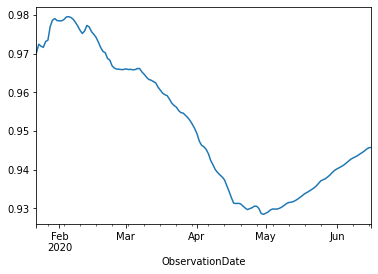

In [208]:
#Se pone un corchete para que genere una srie de tiempo
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

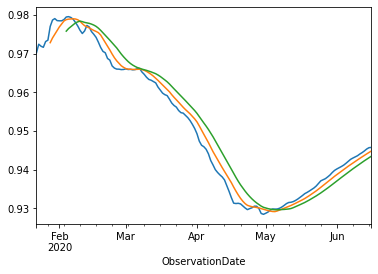

In [209]:
# A la serie se le puede implementar el metodo rolling para crear una ventana de tiempo
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

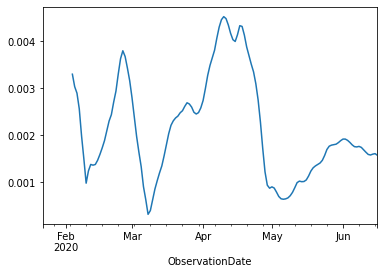

In [210]:
# Veamos como varia nuestro rate con la desviación estandar
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

# Parte 3 
## Visualización y graficación de datos

In [211]:
# Veamos los países con mayor numero de infectados:
df_prueba = df.groupby([('Country/Region'),pd.Grouper(key='ObservationDate',freq='M')])[['Confirmed']].max()

In [212]:
df_prueba.xs('2020-06-30',level='ObservationDate').sort_values('Confirmed',ascending=False)
df_prueba.loc['Brazil']
#.reset_index().sort_values('Confirmed',ascending=False)


,Confirmed
ObservationDate,
2020-01-31,0.0
2020-02-29,2.0
2020-03-31,5717.0
2020-04-30,87187.0
2020-05-31,271885.0
2020-06-30,190285.0


In [213]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
43716,2020-06-16,Mexico,560.0,62.0,335.0
43717,2020-06-16,Ukraine,1726.0,42.0,706.0
43718,2020-06-16,Ukraine,531.0,16.0,336.0
43719,2020-06-16,Mainland China,1269.0,1.0,1267.0


In [214]:
df_diff_general= df.groupby(['Country/Region','ObservationDate']).sum().diff()
df_diff_general

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             NaN     NaN        NaN
('St. Martin',)                2020-03-10             1.0     0.0        0.0
Afghanistan                    2020-02-24            -1.0     0.0        0.0
                               2020-02-25             0.0     0.0        0.0
                               2020-02-26             0.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[20021 rows x 3 columns]

In [215]:
mask = (df_diff_general < 0)
mask

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28           False   False      False
('St. Martin',)                2020-03-10           False   False      False
Afghanistan                    2020-02-24            True   False      False
                               2020-02-25           False   False      False
                               2020-02-26           False   False      False
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12           False   False      False
                               2020-03-14           False   False      False
                               2020-03-15           False   False      False
                               2020-03-16           False   False      False
                               2020-03-17           False   False      False

[20021 rows x 3 columns]

In [216]:
df.groupby(['Country/Region','ObservationDate']).sum().head(1).to_dict()

{'Confirmed': {(' Azerbaijan', Timestamp('2020-02-28 00:00:00')): 1.0},
 'Deaths': {(' Azerbaijan', Timestamp('2020-02-28 00:00:00')): 0.0},
 'Recovered': {(' Azerbaijan', Timestamp('2020-02-28 00:00:00')): 0.0}}

In [217]:
# Los valores diferentes menores a 0 se llenan con 0

df_diff_general[mask] = 0
df_diff_general

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             NaN     NaN        NaN
('St. Martin',)                2020-03-10             1.0     0.0        0.0
Afghanistan                    2020-02-24             0.0     0.0        0.0
                               2020-02-25             0.0     0.0        0.0
                               2020-02-26             0.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[20021 rows x 3 columns]

In [218]:
# Tratamos el valor nan

df_diff_general = df_diff_general.fillna({'Confirmed': 1.0,
  'Deaths':  0.0,
  'Recovered':  0.0})
df_diff_general

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             1.0     0.0        0.0
Afghanistan                    2020-02-24             0.0     0.0        0.0
                               2020-02-25             0.0     0.0        0.0
                               2020-02-26             0.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[20021 rows x 3 columns]

In [219]:
df_diff_general = df_diff_general.reset_index()

In [227]:
# Sacamos el incremento de los casos mes a mes 
df_inc_Monthly = df_diff_general.groupby(['Country/Region',pd.Grouper(key='ObservationDate',freq='M')]).sum()
df_inc_Monthly

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-29             1.0     0.0        0.0
('St. Martin',)                2020-03-31             1.0     0.0        0.0
Afghanistan                    2020-02-29             0.0     0.0        0.0
                               2020-03-31           173.0     4.0        5.0
                               2020-04-30          1997.0    60.0      255.0
...                                                   ...     ...        ...
Zimbabwe                       2020-03-31             7.0     1.0        0.0
                               2020-04-30            32.0     3.0        5.0
                               2020-05-31           144.0     0.0       24.0
                               2020-06-30           213.0     0.0       33.0
occupied Palestinian territory 2020-03-31             0.0     0.0        0.0

[877 rows x 3 columns]

In [237]:
# Obtenemos el del mes que nos interesa, en este caso es junio 
# Y los ordenamos de mayor a menor considerando el numero de casos confirmados

df_inc_June = df_inc_Monthly.xs('2020-06-30',level='ObservationDate').sort_values('Deaths',ascending=False)
df_inc_June.head(20).reset_index()

,Country/Region,Confirmed,Deaths,Recovered
0,Brazil,408340.0,15927.0,283450.0
1,US,347559.0,12582.0,138745.0
2,Mexico,64199.0,8380.0,51622.0
3,India,163456.0,6500.0,95083.0
4,UK,23444.0,3483.0,115.0
5,Russia,138882.0,2581.0,121897.0
6,Peru,72680.0,2550.0,57997.0
7,Chile,84761.0,2329.0,137426.0
8,Pakistan,85264.0,1492.0,33166.0
9,Iran,40973.0,1268.0,33827.0


In [238]:
# Ahora que sabemos que brazil es el foco del covid pasamos a analizarlo individualmente

list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [241]:
#Agrupamos por la prescencia de casos dia por dia

df_time = df.groupby(['Country/Region',
                    pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[20021 rows x 3 columns]

In [243]:
# Saquemos el df de Brazil

df_brazil = df_time.loc['Brazil',:]
df_brazil

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
...,...,...,...
2020-06-12,828810.0,41828.0,445123.0
2020-06-13,850514.0,42720.0,459436.0
2020-06-14,867624.0,43332.0,469141.0


In [244]:
import matplotlib.pyplot as plt

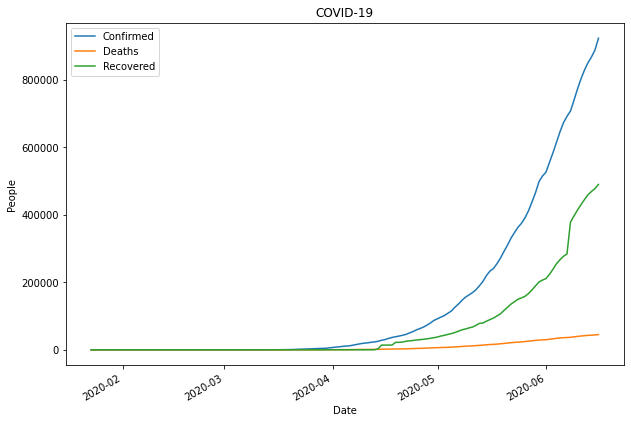

In [248]:
# Graficamos el comportamiento de cada una de las columnas respecto a las fechas
df_brazil.plot(figsize= (10,7),title='COVID-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

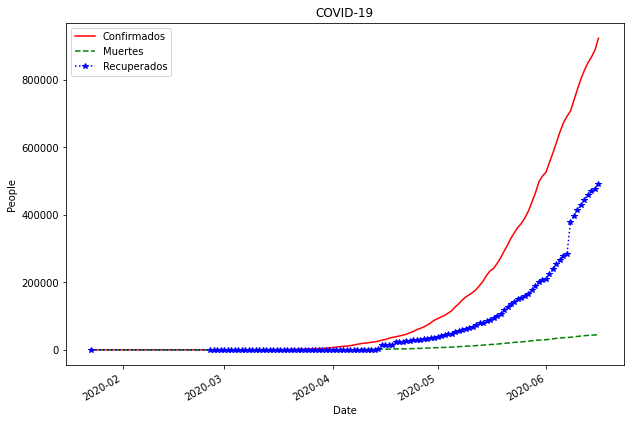

In [252]:
ax = df_brazil.plot(figsize = (10,7),title='COVID-19',
                    legend = False,
                    style = ['r-','g--','b:*'])
ax.legend(['Confirmados','Muertes','Recuperados'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [254]:
# Ahora grafiquemos el comportamiento mensual del COVID en Brazil
df_brazil_monthly = df_brazil.resample('M').max()
df_brazil_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
2020-03-31,5717.0,201.0,127.0
2020-04-30,87187.0,6006.0,35935.0
2020-05-31,514849.0,29314.0,206555.0
2020-06-30,923189.0,45241.0,490005.0


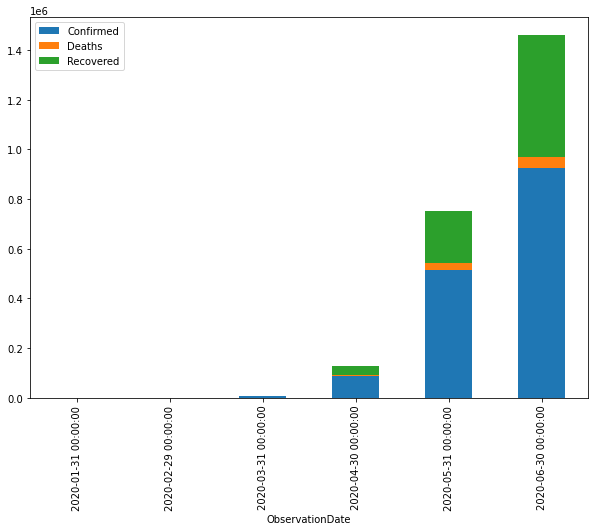

In [255]:
df_brazil_monthly.plot(figsize=(10,7),kind='bar',stacked=True)

In [257]:
 # Ahora veamos cuantos están en tratamiento
 df_brazil_monthly['Traitment'] = df_brazil_monthly['Confirmed'] -df_brazil_monthly['Deaths'] - df_brazil_monthly['Recovered']
 df_brazil_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0,2.0
2020-03-31,5717.0,201.0,127.0,5389.0
2020-04-30,87187.0,6006.0,35935.0,45246.0
2020-05-31,514849.0,29314.0,206555.0,278980.0
2020-06-30,923189.0,45241.0,490005.0,387943.0


No handles with labels found to put in legend.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc2f18d68>,
      dtype=object)

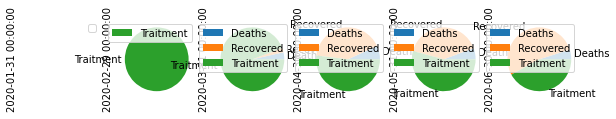

In [259]:
# Grafiquemos estos datos en una grafica de pastel
df_brazil_monthly[['Deaths','Recovered','Traitment']].T.plot(figsize=(10,7),kind = 'pie',subplots=True)

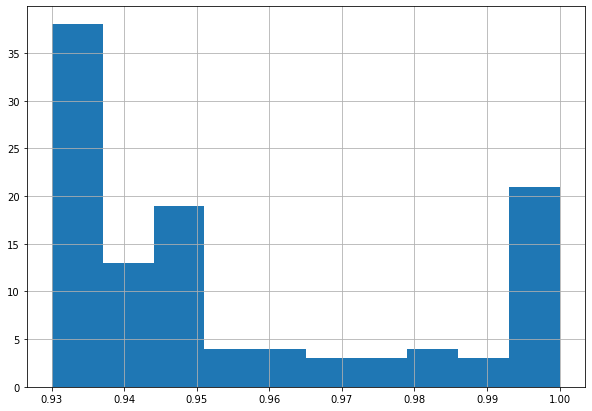

In [260]:
#Veamos el histograma
df_brazil['Rate'] = 1 - df_brazil['Deaths']/df_brazil['Confirmed']
df_brazil['Rate'].hist(figsize=(10,7),bins = 10)

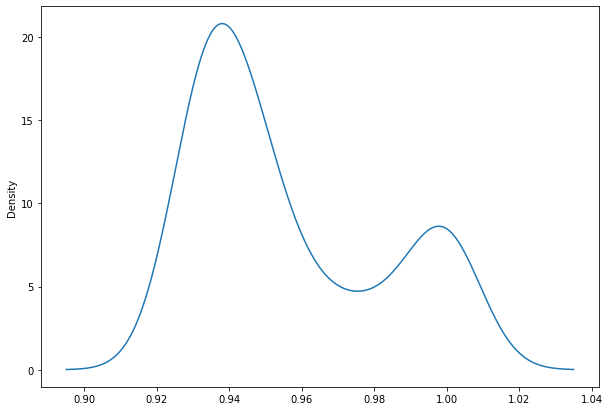

In [261]:
df_brazil['Rate'].plot(kind='kde',figsize=(10,7))